# Problema 2

## O problema
O conjunto de dados (beer_contest.csv no classroom) representa o score de empresas em um

campeonado anual de cerveja feito pela organização mundial de cervejeiros. A organização gostaria

de visualizar o progresso da qualidade da cerveja ao longo dos anos, e prever o quão crescente esse

progresso pode chegar daqui a mais 5 anos.

<br><br>

Neste problema você pode usar uma implementação de qualquer biblioteca (exemplo sklearn) ou a

sua própria implementação de regressão linear

### Tarefa 1
Plotar o gráfico de dispersão e a reta que melhor se ajusta aos dados (que deverá ser feita

usando regressão linear). Mostre os valores de θ_0 e θ_1.

#### Importando as biliotecas necessárias

##### As bibliotecas abaixo são necessárias para os gráficos e tratamento dos dados

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

##### As bibliotecas abaixo são para treino do modelo

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#### Recebendo os dados de ../datasets/raw/beer_contest.csv

In [3]:
beer_contest_raw_data = pd.read_csv("../datasets/raw/beer_contest.csv", sep = ";")

#### Verificando a estrutura da tabela

In [4]:
beer_contest_raw_data.head()

,year,score
0,1,1
1,1,11
2,1,11
3,1,12
4,2,13


Não foi necessário a remoção de espaços em branco,<br><br>
remoção de carateres especiais<br><br>
ou de tratamento dos nomes dos títulos para caixa baixa<br><br>
Também não houve necessidade de tratar dados faltantes - *NaN*s

#### Criando 2 arrays - X e Y - para armazenar as informações contidas na tabela

##### X = anos
##### Y = quantidade de participantes

In [5]:
X = np.array(beer_contest_raw_data.year.astype("uint8"))
X = X.reshape([-1, 1])
print(X)

[[1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [4]
 [4]
 [4]
 [4]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]]


In [6]:
Y = np.array(beer_contest_raw_data.score.astype("uint8"))
print(Y)

[ 1 11 11 12 13 14 14 15 18  2  2 19 37 25 25 23 26 26 25 24 23 22 14 15
 14 15 22 23 14 15 26 26 15 24  3 29 14 15 14 15 28 14 14 15 26 26 25 24
  3 29 14 25 14 15 15]


#### Criando modelo de regressão linear

In [7]:
modelo_regressao_linear = LinearRegression().fit(X, Y)


#### O coeficiente de determinação R<sup>2</sup>

In [8]:
coeficiente_r_quadrado = modelo_regressao_linear.score(X, Y)
print(f"O coeficiente r^2 é: {coeficiente_r_quadrado}")

O coeficiente r^2 é: 0.11425925618959176


#### A interceptação

In [9]:
interceptacao = modelo_regressao_linear.intercept_
print(f"A interceptação é: {interceptacao}")

A interceptação é: 10.86965418457131


#### O valor de angulação da reta - Slope

In [10]:
angulacao_da_reta = modelo_regressao_linear.coef_
print(f"A angulação da reta (Slope) é: {angulacao_da_reta}")

A angulação da reta (Slope) é: [1.43973808]


#### A predição da reta

In [11]:
Y_predito = modelo_regressao_linear.predict(X)
print(f"A predição para reta é: {Y_predito}")

A predição para reta é: [12.30939227 12.30939227 12.30939227 12.30939227 13.74913035 13.74913035
 13.74913035 13.74913035 15.18886843 15.18886843 15.18886843 15.18886843
 16.62860651 16.62860651 16.62860651 16.62860651 18.06834459 18.06834459
 18.06834459 18.06834459 18.06834459 18.06834459 18.06834459 18.06834459
 18.06834459 18.06834459 18.06834459 18.06834459 18.06834459 18.06834459
 19.50808267 19.50808267 19.50808267 19.50808267 19.50808267 19.50808267
 19.50808267 19.50808267 19.50808267 19.50808267 19.50808267 19.50808267
 19.50808267 19.50808267 20.94782075 20.94782075 20.94782075 20.94782075
 20.94782075 20.94782075 20.94782075 20.94782075 20.94782075 20.94782075
 20.94782075]


#### Os valores de θ<sub>0</sub> e θ<sub>1</sub>:

In [12]:
print(f"""
      Os coeficientes são:
      \n
      θ_0 = {interceptacao}
      \n
      θ_1 = {angulacao_da_reta[0]}
      """)


      Os coeficientes são:
      

      θ_0 = 10.86965418457131
      

      θ_1 = 1.439738080622059
      


#### Gráfico de dispersão da reta

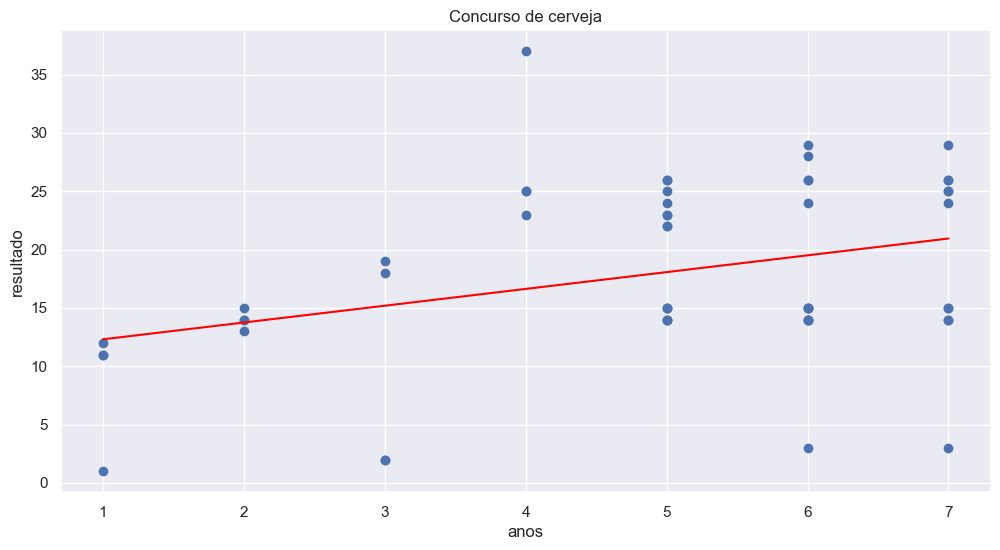

In [13]:
figure, _ = plt.subplots(figsize = (12, 6))
plt.scatter(
    x = X,
    y = Y,
)
plt.plot(
    X,
    Y_predito,
    color = "red"
)
plt.title("Concurso de cerveja")
plt.xlabel("anos")
plt.ylabel("resultado")
plt.show()

#### Gráfico da previsão para 5 anos no futuro

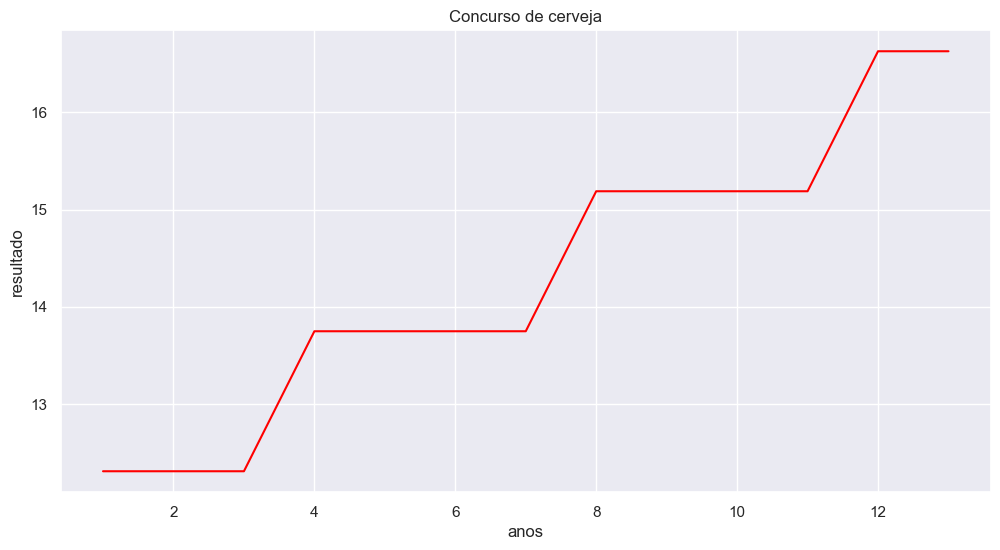

In [14]:
figure, axis = plt.subplots(figsize = (12, 6))
vetor = np.arange(1, 14)
plt.plot(
    vetor,
    Y_predito[1:14],
    color = "red"
)
plt.xlim = 13
plt.title("Concurso de cerveja")
plt.xlabel("anos")
plt.ylabel("resultado")
plt.show()

### Tarefa 2
Note que, no capeonato existem empresas que participam em todas as edições e empresas<br>

novas, que participam apenas das ultimas edições, bem como empresas que participaram no passado<br>

e não participam mais.

#### a) Mostre a contagem de empresas participantes em cada ano

In [15]:
quantidade_por_anos = beer_contest_raw_data.year.value_counts().sort_index()
print(f"{quantidade_por_anos}\n")

year
1     4
2     4
3     4
4     4
5    14
6    14
7    11
Name: count, dtype: int64



#### b) Calcule a média do score por ano e mostre curva que melhor se ajusta aos dados médios.
#### Mostre os valores de θ<sub>0</sub> e θ<sub>1</sub>

##### Observando o dataframe

In [16]:
beer_contest_raw_data.head(10)

,year,score
0,1,1
1,1,11
2,1,11
3,1,12
4,2,13
5,2,14
6,2,14
7,2,15
8,3,18
9,3,2


##### Observando a coluna *score*

In [17]:
beer_contest_raw_data.score.head(10)

0     1
1    11
2    11
3    12
4    13
5    14
6    14
7    15
8    18
9     2
Name: score, dtype: int64

##### Calculando as médias

In [18]:
# anos = beer_contest_raw_data.year.unique()
# medias = np.array([media_ano_1, media_ano_2, media_ano_3, media_ano_4, media_ano_5, media_ano_6, media_ano_7])
data_frame = beer_contest_raw_data.groupby("year", as_index = False).agg("mean")
print(beer_contest_raw_data.groupby("year").agg("count"))
print("\n")
print(data_frame)

      score
year       
1         4
2         4
3         4
4         4
5        14
6        14
7        11


   year      score
0     1   8.750000
1     2  14.000000
2     3  10.250000
3     4  27.500000
4     5  19.857143
5     6  18.000000
6     7  19.636364


##### Calculando θ<sub>0</sub> e θ<sub>1</sub>

In [19]:
x = data_frame.drop(axis = 1, columns = "score")
y = data_frame.score
modelo_linear = LinearRegression().fit(x, y)
theta_0 = modelo_linear.intercept_
theta_1 = modelo_linear.coef_

##### Imprimindo os valores de θ<sub>0</sub> e θ<sub>1</sub>

In [20]:
print(f"""
      Os coeficientes são:
      \n
      θ_0 = {theta_0}
      \n
      θ_1 = {theta_1[0]}
      """)


      Os coeficientes são:
      

      θ_0 = 9.67532467532468
      

      θ_1 = 1.7952226345083484
      


##### Plotando os dados

In [21]:
Y_predito = modelo_linear.predict(x)
print(Y_predito)

[11.47054731 13.26576994 15.06099258 16.85621521 18.65143785 20.44666048
 22.24188312]


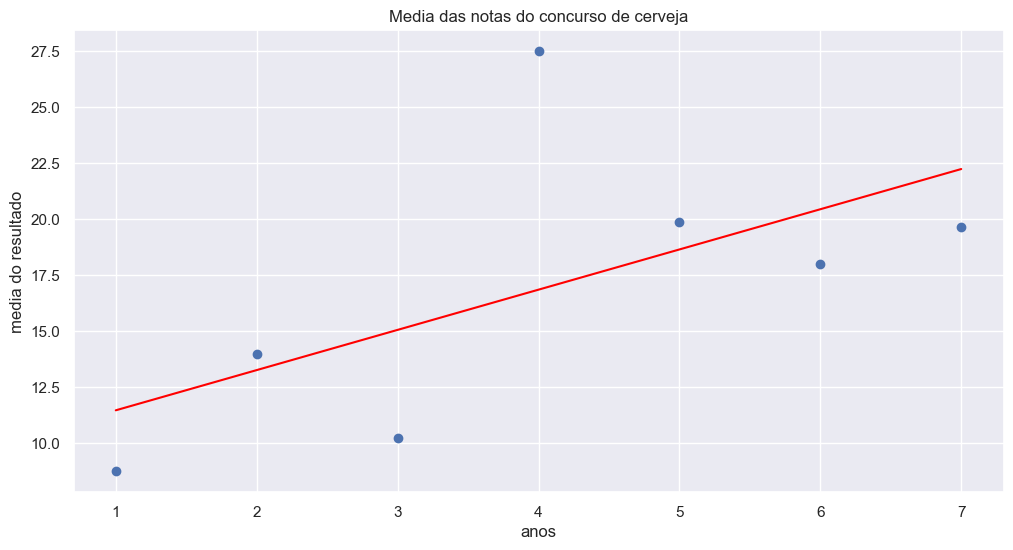

In [22]:
figure, _ = plt.subplots(figsize = (12, 6))
plt.scatter(
    x = data_frame["year"],
    y = data_frame["score"],
)
plt.plot(
    data_frame["year"],
    Y_predito,
    color = "red"
)
plt.title("Media das notas do concurso de cerveja")
plt.xlabel("anos")
plt.ylabel("media do resultado")
plt.show()

#### c) As retas são as mesmas ou diferentes? Comente sobre possíveis justificativas possíveis motivos
#### que levam elas a terem essa igualdade/diferença no comportamento.

As retas são iguais entre si.<br>
Uma possível justificativa para tal comportamento é o funcionamento do cálculo da função de custo *J*, onde é feito uma média<br>
em cada série, nesse caso, em cada ano, e a partir desta média, é calculado a distância entre os valores reais dos pontos *y* verdadeiros e o<br>
valor de y da reta desenhada no gráfico.